In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("middleSchoolData.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           594 non-null    object 
 1   school_name                   594 non-null    object 
 2   applications                  594 non-null    int64  
 3   acceptances                   594 non-null    int64  
 4   per_pupil_spending            473 non-null    float64
 5   avg_class_size                473 non-null    float64
 6   asian_percent                 592 non-null    float64
 7   black_percent                 592 non-null    float64
 8   hispanic_percent              592 non-null    float64
 9   multiple_percent              592 non-null    float64
 10  white_percent                 592 non-null    float64
 11  rigorous_instruction          551 non-null    float64
 12  collaborative_teachers        551 non-null    float64
 13  suppo

In [4]:
data.describe()

,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
count,594.000000,594.000000,473.000000,473.000000,592.000000,592.000000,592.000000,592.000000,592.000000,551.000000,...,551.000000,549.000000,549.000000,592.000000,592.000000,592.000000,592.000000,547.000000,586.000000,586.000000
mean,42.675084,7.510101,20752.021142,21.927611,9.888345,34.411655,42.176182,2.167061,11.354730,3.653829,...,3.569891,3.543406,3.588087,21.337331,77.677365,11.571959,622.398649,3.402340,0.465973,0.416331
std,59.786894,21.146180,3900.259115,4.844182,15.055115,28.053603,25.802657,2.309272,17.495877,0.650584,...,0.608429,0.655486,0.585292,8.102065,18.885488,11.038138,375.354046,0.704331,0.189849,0.218728
min,0.000000,0.000000,13260.000000,6.970000,0.000000,0.000000,2.100000,0.000000,0.000000,1.860000,...,1.300000,1.490000,1.100000,0.000000,8.400000,0.000000,33.000000,1.410000,0.150000,0.150000
25%,11.000000,0.000000,18095.000000,18.410000,1.100000,9.775000,19.375000,0.800000,1.100000,3.240000,...,3.230000,3.150000,3.240000,16.100000,72.400000,3.875000,336.750000,2.920000,0.310000,0.220000
50%,23.000000,1.000000,20147.000000,22.050000,2.900000,26.200000,36.200000,1.400000,2.500000,3.660000,...,3.610000,3.620000,3.640000,20.750000,82.850000,8.700000,537.500000,3.410000,0.430000,0.370000
75%,42.000000,2.000000,22828.000000,25.140000,10.100000,59.300000,65.300000,2.600000,14.725000,4.130000,...,4.000000,4.000000,3.990000,25.825000,90.700000,15.900000,792.000000,3.940000,0.607500,0.580000
max,394.000000,205.000000,53217.000000,39.000000,81.400000,96.000000,100.000000,18.700000,85.100000,4.940000,...,4.990000,4.990000,4.990000,100.000000,99.400000,100.000000,2238.000000,4.990000,0.900000,0.900000


### Q1) What is the correlation between the number of applications and admissions to HSPHS?

No missing data <br />
Calculated Correlation <br />
Graphed Data <br />

In [5]:
df = data.copy()

In [6]:
applicatons = df.applications
accepted = df.acceptances

In [7]:
correlationAppAccept = np.corrcoef(applicatons, accepted)

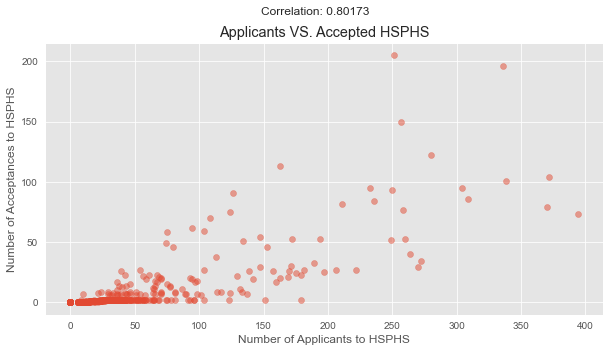

In [8]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.xlabel('Number of Applicants to HSPHS')
plt.ylabel('Number of Acceptances to HSPHS')
plt.title("Applicants VS. Accepted HSPHS")
plt.suptitle("Correlation: " + str(round(correlationAppAccept[0][1],5)))
plt.scatter(applicatons, accepted, alpha=0.5)
plt.savefig("Fig Q1.png", bbox_inches="tight")

### Q2 0What is a better predictor of admission to HSPHS? Raw number of applications or application *rate*?

DROPPED THE TWO SCHOOLS WERE THERE WAS NO SCHOOL SIZE <br />
Calculated The two Correlations <br />
Made the two graphs <br />

In [9]:
df = data.copy()

In [10]:
df.school_size.isnull().sum()

2

In [11]:
df = df[df['school_size'].notna()]

In [12]:
df.school_size.isnull().sum()

0

In [13]:
applicatons = df.applications
applicationRate = df.applications/df.school_size
acceptances = df.acceptances

In [14]:
corr1 = np.corrcoef(applicatons, acceptances)
corr2 = np.corrcoef(applicationRate, acceptances)

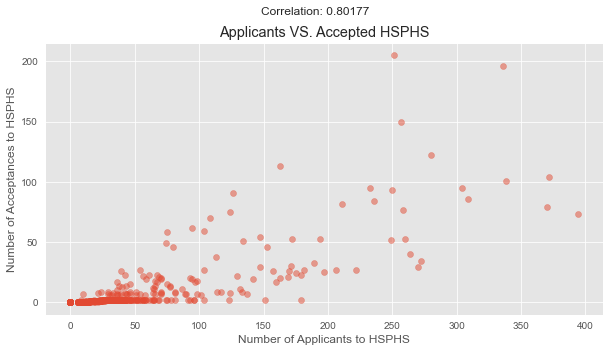

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.xlabel('Number of Applicants to HSPHS')
plt.ylabel('Number of Acceptances to HSPHS')
plt.title("Applicants VS. Accepted HSPHS")
plt.suptitle("Correlation: " + str(round(corr1[0][1],5)))
plt.scatter(applicatons, acceptances, alpha=0.5)
plt.savefig("Fig Q2.1.png", bbox_inches="tight")

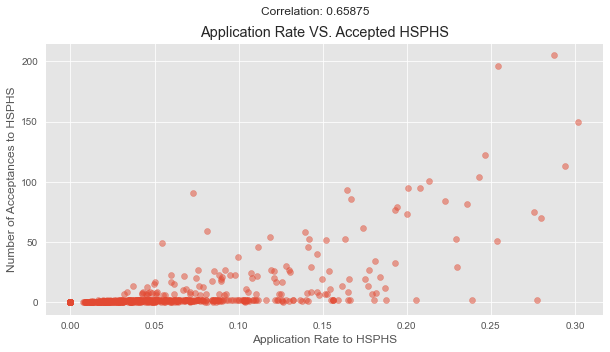

In [16]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.xlabel('Application Rate to HSPHS')
plt.ylabel('Number of Acceptances to HSPHS')
plt.title("Application Rate VS. Accepted HSPHS")
plt.suptitle("Correlation: " + str(round(corr2[0][1],5)))
plt.scatter(applicationRate, acceptances, alpha=0.5)
plt.savefig("Fig Q2.2.png", bbox_inches="tight")

In [17]:
df['applicationRate'] = df.applications/df.school_size
temp = df[['acceptances', 'applicationRate', 'applications']]
corMatrix = temp.corr(method="pearson")
corMatrix

,acceptances,applicationRate,applications
acceptances,1.000000,0.658751,0.801766
applicationRate,0.658751,1.000000,0.754653
applications,0.801766,0.754653,1.000000


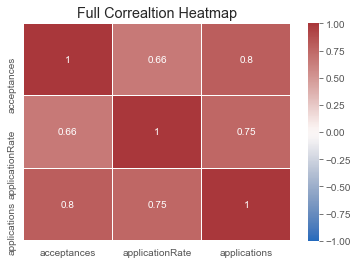

In [18]:
sns.heatmap(corMatrix, linewidths=.25, cmap='vlag', vmax=1, vmin=-1, annot=True)
plt.title('Full Correaltion Heatmap')
plt.savefig("Fig Q2.3.png", bbox_inches="tight")

In [19]:
df.school_size.min()

33.0

In [20]:
df.acceptances.nlargest(10)

304    205
324    196
33     150
241    122
22     113
316    104
306    101
385     95
389     95
372     93
Name: acceptances, dtype: int64

### Q3) Which school has the best *per student* odds of sending someone to HSPHS? 

DROPPED THE TWO SCHOOLS WERE THERE WAS NO SCHOOL SIZE <br />
Calculated Odds per studnet, not odds per applicant<br />
Made a histogram of odds of getting in <br />

In [21]:
df = data.copy()

In [22]:
df.school_size.isnull().sum()

2

In [23]:
df = df[df['school_size'].notna()]

In [24]:
df.school_size.isnull().sum()

0

In [25]:
df['oddsPerStudnet'] = df.acceptances / df.school_size

In [26]:
bestSchool = df.iloc[df['oddsPerStudnet'].argmax()] 

In [27]:
bestSchool

dbn                                                            20K187
school_name                     THE CHRISTA MCAULIFFE SCHOOL\I.S. 187
applications                                                      251
acceptances                                                       205
per_pupil_spending                                            17403.0
avg_class_size                                                  27.71
asian_percent                                                    67.5
black_percent                                                     1.3
hispanic_percent                                                  6.8
multiple_percent                                                  0.6
white_percent                                                    23.9
rigorous_instruction                                             4.84
collaborative_teachers                                           4.48
supportive_environment                                           4.44
effective_school_lea

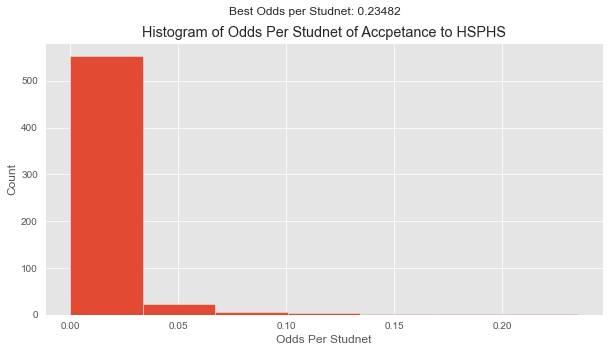

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.xlabel('Odds Per Studnet')
plt.ylabel('Count')
plt.title("Histogram of Odds Per Studnet of Accpetance to HSPHS")
plt.suptitle("Best Odds per Studnet: " + str(round(bestSchool[-1],5)))
plt.hist(df.oddsPerStudnet, bins=7)
plt.savefig("Fig Q3.1.png", bbox_inches="tight")

### Q4) Is there a relationship between how students perceive their school (as reported in columns L-Q) and how the school performs on objective measures of achievement (as noted in columns V-X). 

Dropped Null Data and ended with 524 columns

In [29]:
df = data.copy()

In [30]:
df.columns

Index(['dbn', 'school_name', 'applications', 'acceptances',
       'per_pupil_spending', 'avg_class_size', 'asian_percent',
       'black_percent', 'hispanic_percent', 'multiple_percent',
       'white_percent', 'rigorous_instruction', 'collaborative_teachers',
       'supportive_environment', 'effective_school_leadership',
       'strong_family_community_ties', 'trust', 'disability_percent',
       'poverty_percent', 'ESL_percent', 'school_size', 'student_achievement',
       'reading_scores_exceed', 'math_scores_exceed'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           594 non-null    object 
 1   school_name                   594 non-null    object 
 2   applications                  594 non-null    int64  
 3   acceptances                   594 non-null    int64  
 4   per_pupil_spending            473 non-null    float64
 5   avg_class_size                473 non-null    float64
 6   asian_percent                 592 non-null    float64
 7   black_percent                 592 non-null    float64
 8   hispanic_percent              592 non-null    float64
 9   multiple_percent              592 non-null    float64
 10  white_percent                 592 non-null    float64
 11  rigorous_instruction          551 non-null    float64
 12  collaborative_teachers        551 non-null    float64
 13  suppo

In [32]:
df = df[df['rigorous_instruction'].notna()]
df = df[df['collaborative_teachers'].notna()]
df = df[df['supportive_environment'].notna()]
df = df[df['effective_school_leadership'].notna()]
df = df[df['strong_family_community_ties'].notna()]
df = df[df['trust'].notna()]
df = df[df['student_achievement'].notna()]
df = df[df['reading_scores_exceed'].notna()]
df = df[df['math_scores_exceed'].notna()]

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526 entries, 0 to 593
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           526 non-null    object 
 1   school_name                   526 non-null    object 
 2   applications                  526 non-null    int64  
 3   acceptances                   526 non-null    int64  
 4   per_pupil_spending            451 non-null    float64
 5   avg_class_size                451 non-null    float64
 6   asian_percent                 524 non-null    float64
 7   black_percent                 524 non-null    float64
 8   hispanic_percent              524 non-null    float64
 9   multiple_percent              524 non-null    float64
 10  white_percent                 524 non-null    float64
 11  rigorous_instruction          526 non-null    float64
 12  collaborative_teachers        526 non-null    float64
 13  suppo

In [34]:
temp = df[['rigorous_instruction', 'collaborative_teachers', 'supportive_environment', 'effective_school_leadership', 'strong_family_community_ties', 'trust', 
           'student_achievement', 'reading_scores_exceed', 'math_scores_exceed', ]]
corMatrix = temp.corr(method="pearson")
corMatrix

,rigorous_instruction,collaborative_teachers,supportive_environment,effective_school_leadership,strong_family_community_ties,trust,student_achievement,reading_scores_exceed,math_scores_exceed
rigorous_instruction,1.000000,0.707626,0.619687,0.533725,0.387611,0.453815,0.389763,0.433949,0.411776
collaborative_teachers,0.707626,1.000000,0.541820,0.742647,0.432625,0.675987,0.262455,0.293610,0.272121
supportive_environment,0.619687,0.541820,1.000000,0.477246,0.473713,0.516343,0.484432,0.435583,0.416344
effective_school_leadership,0.533725,0.742647,0.477246,1.000000,0.481095,0.741001,0.186875,0.112107,0.089678
strong_family_community_ties,0.387611,0.432625,0.473713,0.481095,1.000000,0.556467,0.202093,0.234357,0.210793
trust,0.453815,0.675987,0.516343,0.741001,0.556467,1.000000,0.239566,0.046542,0.047938
student_achievement,0.389763,0.262455,0.484432,0.186875,0.202093,0.239566,1.000000,0.349406,0.355369
reading_scores_exceed,0.433949,0.293610,0.435583,0.112107,0.234357,0.046542,0.349406,1.000000,0.979334
math_scores_exceed,0.411776,0.272121,0.416344,0.089678,0.210793,0.047938,0.355369,0.979334,1.000000


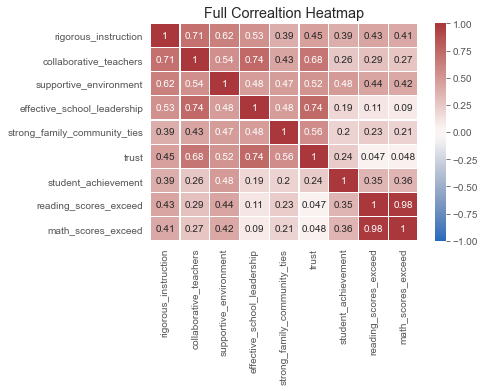

In [35]:
sns.heatmap(corMatrix, linewidths=.25, cmap='vlag', vmax=1, vmin=-1, annot=True)
plt.title('Full Correaltion Heatmap')
plt.savefig("Fig Q4.1.png", bbox_inches="tight")

In [36]:
corMatrix = corMatrix[['rigorous_instruction', 'collaborative_teachers', 'supportive_environment', 'effective_school_leadership', 'strong_family_community_ties', 'trust']]
corMatrix = corMatrix.T
corMatrix = corMatrix[['student_achievement', 'reading_scores_exceed', 'math_scores_exceed']]

In [37]:
corMatrix

,student_achievement,reading_scores_exceed,math_scores_exceed
rigorous_instruction,0.389763,0.433949,0.411776
collaborative_teachers,0.262455,0.293610,0.272121
supportive_environment,0.484432,0.435583,0.416344
effective_school_leadership,0.186875,0.112107,0.089678
strong_family_community_ties,0.202093,0.234357,0.210793
trust,0.239566,0.046542,0.047938


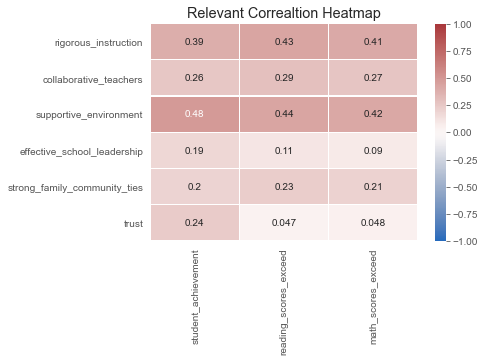

In [38]:
sns.heatmap(corMatrix, linewidths=.25, cmap='vlag', vmax=1, vmin=-1, annot=True)
plt.title('Relevant Correaltion Heatmap')
plt.savefig("Fig Q4.2.png", bbox_inches="tight")

In [39]:
X = df[['rigorous_instruction', 'collaborative_teachers', 'supportive_environment', 'effective_school_leadership', 'strong_family_community_ties', 'trust']]
y = df[['student_achievement']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.2602253181647378

In [40]:
X = df[['rigorous_instruction', 'collaborative_teachers', 'supportive_environment', 'effective_school_leadership', 'strong_family_community_ties', 'trust']]
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.32903498964967404

In [41]:
X = df[['rigorous_instruction', 'collaborative_teachers', 'supportive_environment', 'effective_school_leadership', 'strong_family_community_ties', 'trust']]
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.2954860353528842

In [42]:
X = df[['rigorous_instruction', 'collaborative_teachers', 'supportive_environment']]
y = df[['student_achievement']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.2537682113970038

In [43]:
X = df[['rigorous_instruction', 'collaborative_teachers', 'supportive_environment']]
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.23696809815440179

In [44]:
X = df[['rigorous_instruction', 'collaborative_teachers', 'supportive_environment']]
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.21617623107271544

In [45]:
X = df[['rigorous_instruction', 'supportive_environment']]
y = df[['student_achievement']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.24769731987607202

In [46]:
X = df[['rigorous_instruction', 'supportive_environment']]
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.23340863288408042

In [47]:
X = df[['rigorous_instruction', 'supportive_environment']]
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.2117293246993336

In [48]:
from sklearn.preprocessing import StandardScaler
features = ['rigorous_instruction', 'collaborative_teachers', 'supportive_environment', 'effective_school_leadership', 'strong_family_community_ties', 'trust']
# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6'])

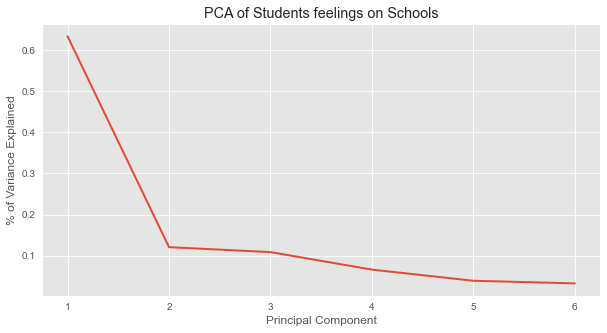

In [50]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.ylabel('% of Variance Explained')
plt.xlabel('Principal Component')
plt.title("PCA of Students feelings on Schools")
PC_values = np.arange(pca.n_components_) + 1
plt.xticks([1,2,3,4,5,6])
plt.plot(PC_values, pca.explained_variance_ratio_, linewidth=2)
plt.savefig("Fig Q4.3.png", bbox_inches="tight")

In [51]:
pca.explained_variance_ratio_[:3].sum()

0.8627489897054945

In [52]:
pca.explained_variance_ratio_

array([0.63357962, 0.12057266, 0.1085967 , 0.06594451, 0.03887299,
       0.0324335 ])

In [53]:
inputPCA = principalDf[['principal component 1', 'principal component 2', 'principal component 3']]

In [54]:
from sklearn.preprocessing import StandardScaler
features = ['student_achievement', 'reading_scores_exceed', 'math_scores_exceed']
# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

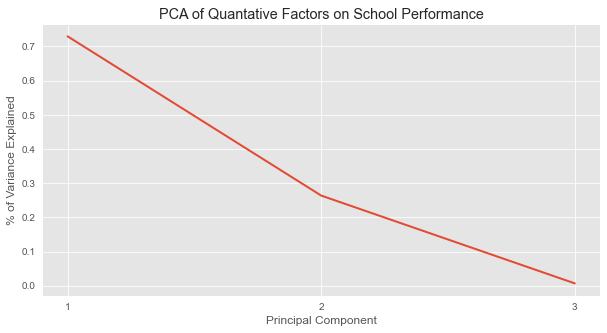

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.ylabel('% of Variance Explained')
plt.xlabel('Principal Component')
plt.title("PCA of Quantative Factors on School Performance")
PC_values = np.arange(pca.n_components_) + 1
plt.xticks([1,2,3])
plt.plot(PC_values, pca.explained_variance_ratio_, linewidth=2)
plt.savefig("Fig Q4.4.png", bbox_inches="tight")

In [57]:
pca.explained_variance_ratio_

array([0.72944328, 0.26367499, 0.00688173])

In [58]:
targetdf = principalDf[['principal component 1']]

In [59]:
from sklearn.preprocessing import StandardScaler
features = ['reading_scores_exceed', 'math_scores_exceed']
# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

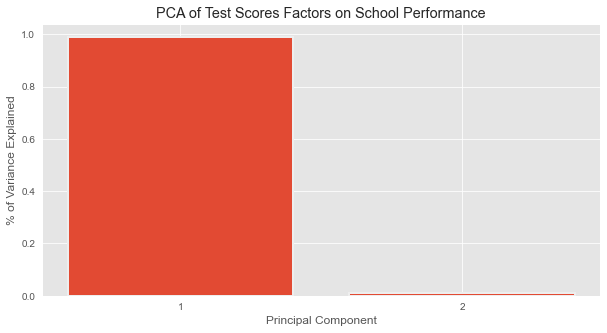

In [61]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.ylabel('% of Variance Explained')
plt.xlabel('Principal Component')
plt.title("PCA of Test Scores Factors on School Performance")
PC_values = np.arange(pca.n_components_) + 1
plt.xticks([1,2])
plt.bar(PC_values, pca.explained_variance_ratio_, linewidth=2)
plt.savefig("Fig Q4.5.png", bbox_inches="tight")

In [62]:
pca.explained_variance_ratio_

array([0.98966698, 0.01033302])

In [63]:
target2df = principalDf[['principal component 1']]

In [64]:
X = inputPCA
y = df[['student_achievement']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.2363846590297226

In [65]:
X = inputPCA
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.30329495527069206

In [66]:
X = inputPCA
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.2781224851132422

In [67]:
X = inputPCA
y = targetdf
model = LinearRegression().fit(X, y)
model.score(X, y)

0.35916280499046893

In [68]:
X = inputPCA
y = target2df
model = LinearRegression().fit(X, y)
model.score(X, y)

0.2935744466564202

### Q5) Test a hypothesis of your choice as to which kind of school (e.g. small schools vs. large schools or charter schools vs. not (or any other classification, such as rich vs. poor school)) performs differently than another kind either on some dependent measure, e.g. objective measures of achievement or admission to HSPHS (pick one). 
Test Poverty Percentage to a Schools Acceptances

In [69]:
df = data.copy()

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           594 non-null    object 
 1   school_name                   594 non-null    object 
 2   applications                  594 non-null    int64  
 3   acceptances                   594 non-null    int64  
 4   per_pupil_spending            473 non-null    float64
 5   avg_class_size                473 non-null    float64
 6   asian_percent                 592 non-null    float64
 7   black_percent                 592 non-null    float64
 8   hispanic_percent              592 non-null    float64
 9   multiple_percent              592 non-null    float64
 10  white_percent                 592 non-null    float64
 11  rigorous_instruction          551 non-null    float64
 12  collaborative_teachers        551 non-null    float64
 13  suppo

In [71]:
df = df[df['poverty_percent'].notna()]
df = df[df['student_achievement'].notna()]

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 593
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           545 non-null    object 
 1   school_name                   545 non-null    object 
 2   applications                  545 non-null    int64  
 3   acceptances                   545 non-null    int64  
 4   per_pupil_spending            458 non-null    float64
 5   avg_class_size                458 non-null    float64
 6   asian_percent                 545 non-null    float64
 7   black_percent                 545 non-null    float64
 8   hispanic_percent              545 non-null    float64
 9   multiple_percent              545 non-null    float64
 10  white_percent                 545 non-null    float64
 11  rigorous_instruction          529 non-null    float64
 12  collaborative_teachers        529 non-null    float64
 13  suppo

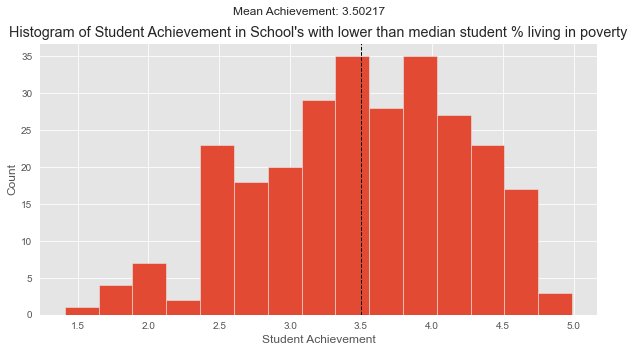

In [73]:
temp = df[df['poverty_percent'] < df.poverty_percent.median()]

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.xlabel("Student Achievement")
plt.ylabel('Count')
plt.title('Histogram of Student Achievement in School\'s with lower than median student % living in poverty')
plt.suptitle("Mean Achievement: " + str(round(temp.student_achievement.mean(),5)))
plt.hist(temp.student_achievement, bins = 15)
plt.axvline(temp.student_achievement.mean(), color='k', linestyle='dashed', linewidth=1)
plt.savefig("Fig Q5.1.png", bbox_inches="tight")

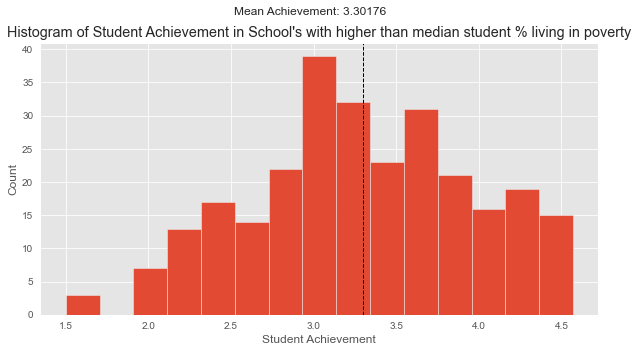

In [74]:
temp = df[df['poverty_percent'] > df.poverty_percent.median()]

plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.xlabel('Student Achievement')
plt.ylabel('Count')
plt.title("Histogram of Student Achievement in School\'s with higher than median student % living in poverty")
plt.suptitle("Mean Achievement: " + str(round(temp.student_achievement.mean(),5)))
plt.hist(temp.student_achievement, bins = 15)
plt.axvline(temp.student_achievement.mean(), color='k', linestyle='dashed', linewidth=1)
plt.savefig("Fig Q5.2.png", bbox_inches="tight")

In [75]:
# Example of the Mann-Whitney U Test
from scipy.stats import mannwhitneyu
data1 = df[df['poverty_percent'] > df.poverty_percent.median()].student_achievement
data2 = df[df['poverty_percent'] < df.poverty_percent.median()].student_achievement
stat, p = mannwhitneyu(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=30750.500, p=0.000
Probably different distributions


In [76]:
# Example of the Student's t-test
from scipy.stats import ttest_ind
data1 = df[df['poverty_percent'] > df.poverty_percent.median()].student_achievement
data2 = df[df['poverty_percent'] < df.poverty_percent.median()].student_achievement
stat, p = ttest_ind(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=-3.351, p=0.001
Probably different distributions


### Q6) Is there any evidence that the availability of material resources (e.g. per student spending or class size) impacts objective measures of achievement or admission to HSPHS? 

In [77]:
df = data.copy()

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           594 non-null    object 
 1   school_name                   594 non-null    object 
 2   applications                  594 non-null    int64  
 3   acceptances                   594 non-null    int64  
 4   per_pupil_spending            473 non-null    float64
 5   avg_class_size                473 non-null    float64
 6   asian_percent                 592 non-null    float64
 7   black_percent                 592 non-null    float64
 8   hispanic_percent              592 non-null    float64
 9   multiple_percent              592 non-null    float64
 10  white_percent                 592 non-null    float64
 11  rigorous_instruction          551 non-null    float64
 12  collaborative_teachers        551 non-null    float64
 13  suppo

In [79]:
df = df[df['per_pupil_spending'].notna()]
df = df[df['avg_class_size'].notna()]
df = df[df['poverty_percent'].notna()]
df = df[df['student_achievement'].notna()]
df = df[df['reading_scores_exceed'].notna()]
df = df[df['math_scores_exceed'].notna()]

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 484
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           458 non-null    object 
 1   school_name                   458 non-null    object 
 2   applications                  458 non-null    int64  
 3   acceptances                   458 non-null    int64  
 4   per_pupil_spending            458 non-null    float64
 5   avg_class_size                458 non-null    float64
 6   asian_percent                 458 non-null    float64
 7   black_percent                 458 non-null    float64
 8   hispanic_percent              458 non-null    float64
 9   multiple_percent              458 non-null    float64
 10  white_percent                 458 non-null    float64
 11  rigorous_instruction          451 non-null    float64
 12  collaborative_teachers        451 non-null    float64
 13  suppo

In [81]:
temp = df[['per_pupil_spending', 'avg_class_size', 'poverty_percent', 'student_achievement', 'reading_scores_exceed', 'math_scores_exceed']]
corMatrix = temp.corr(method="pearson")
corMatrix

,per_pupil_spending,avg_class_size,poverty_percent,student_achievement,reading_scores_exceed,math_scores_exceed
per_pupil_spending,1.000000,-0.462768,0.342591,-0.157425,-0.498802,-0.484196
avg_class_size,-0.462768,1.000000,-0.413316,0.207207,0.536113,0.557463
poverty_percent,0.342591,-0.413316,1.000000,-0.281255,-0.763050,-0.743218
student_achievement,-0.157425,0.207207,-0.281255,1.000000,0.413095,0.422464
reading_scores_exceed,-0.498802,0.536113,-0.763050,0.413095,1.000000,0.982539
math_scores_exceed,-0.484196,0.557463,-0.743218,0.422464,0.982539,1.000000


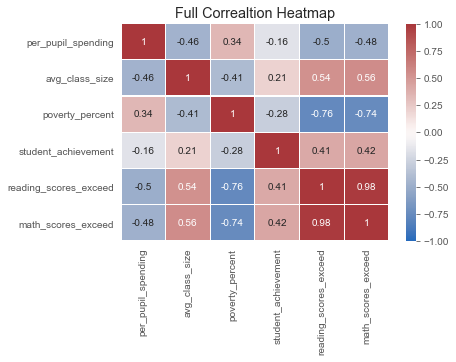

In [83]:
sns.heatmap(corMatrix, linewidths=.25, cmap='vlag', vmax=1, vmin=-1, annot=True)
plt.title('Full Correaltion Heatmap')
plt.tight_layout
plt.savefig("Fig Q6.1.png", bbox_inches="tight")

In [84]:
corMatrix = corMatrix[['per_pupil_spending', 'avg_class_size', 'poverty_percent']]
corMatrix = corMatrix.T
corMatrix = corMatrix[['student_achievement', 'reading_scores_exceed', 'math_scores_exceed']]

In [85]:
corMatrix

,student_achievement,reading_scores_exceed,math_scores_exceed
per_pupil_spending,-0.157425,-0.498802,-0.484196
avg_class_size,0.207207,0.536113,0.557463
poverty_percent,-0.281255,-0.763050,-0.743218


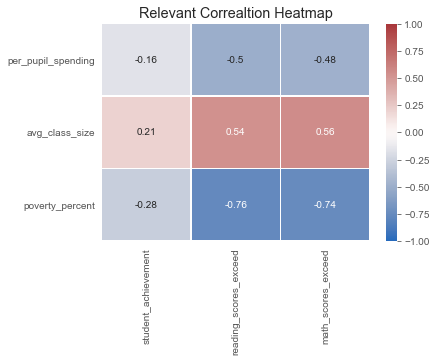

In [86]:
sns.heatmap(corMatrix, linewidths=.25, cmap='vlag', vmax=1, vmin=-1, annot=True)
plt.title('Relevant Correaltion Heatmap')
plt.tight_layout
plt.savefig("Fig Q6.2.png", bbox_inches="tight")


In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
X = df[['per_pupil_spending', 'avg_class_size', 'poverty_percent']]
y = df[['student_achievement']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.08996299618787562

In [89]:
X = df[['per_pupil_spending', 'avg_class_size', 'poverty_percent']]
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.6714332381800487

In [90]:
X = df[['per_pupil_spending', 'avg_class_size', 'poverty_percent']]
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.6511195278698535

In [91]:
X = df[['per_pupil_spending', 'avg_class_size']]
y = df[['student_achievement']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.047753156125426854

In [92]:
X = df[['per_pupil_spending', 'avg_class_size']]
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.36739913310727246

In [93]:
X = df[['per_pupil_spending', 'avg_class_size']]
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.37588710127038927

### Q7) What proportion of schools accounts for 90% of all students accepted to HSPHS? 

In [133]:
df = data.copy()

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           594 non-null    object 
 1   school_name                   594 non-null    object 
 2   applications                  594 non-null    int64  
 3   acceptances                   594 non-null    int64  
 4   per_pupil_spending            473 non-null    float64
 5   avg_class_size                473 non-null    float64
 6   asian_percent                 592 non-null    float64
 7   black_percent                 592 non-null    float64
 8   hispanic_percent              592 non-null    float64
 9   multiple_percent              592 non-null    float64
 10  white_percent                 592 non-null    float64
 11  rigorous_instruction          551 non-null    float64
 12  collaborative_teachers        551 non-null    float64
 13  suppo

In [135]:
totalAcceptances = df.acceptances.sum()
target = totalAcceptances * 0.9

In [136]:
target

4014.9

In [137]:
currentTotal = 0
count = 0
while currentTotal < target:
    count += 1
    currentTotal = df.acceptances.nlargest(count).sum()

In [138]:
count
currentTotal

4016

In [139]:
count/len(df.school_name)

0.20707070707070707

In [140]:
df = data.copy()
df = df[df['acceptances'] != 0]
df.sort_values(by='acceptances', ascending=False)

,dbn,school_name,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
304,20K187,THE CHRISTA MCAULIFFE SCHOOL\I.S. 187,251,205,17403.0,27.71,67.5,1.3,6.8,0.6,...,4.16,3.74,4.17,11.3,65.8,3.3,873.0,4.36,0.90,0.90
324,21K239,MARK TWAIN I.S. 239 FOR THE GIFTED & TALENTED,336,196,16814.0,30.51,27.8,6.9,5.7,8.2,...,3.77,3.49,3.77,11.9,37.7,1.1,1322.0,4.16,0.88,0.88
33,03M054,J.H.S. 054 BOOKER T. WASHINGTON,257,150,17359.0,25.47,11.0,8.6,14.7,8.0,...,3.62,4.45,3.52,11.5,23.8,1.1,852.0,4.14,0.89,0.88
241,15K051,M.S. 51 WILLIAM ALEXANDER,280,122,16145.0,25.36,16.4,7.6,20.4,4.7,...,3.83,3.10,3.31,17.7,28.7,2.2,1136.0,4.05,0.83,0.83
22,02M312,NEW YORK CITY LAB MIDDLE SCHOOL FOR COLLABORAT...,163,113,15853.0,31.83,55.1,2.0,6.5,6.5,...,3.27,4.08,4.03,16.4,38.3,1.4,554.0,4.34,0.88,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,06M143,J.H.S. 143 ELEANOR ROOSEVELT,17,1,24818.0,21.24,0.0,2.3,91.7,0.8,...,3.13,3.27,3.91,27.9,88.7,58.9,265.0,3.25,0.17,0.15
406,27Q262,CHANNEL VIEW SCHOOL FOR RESEARCH,15,1,21414.0,19.45,8.7,42.9,34.3,2.0,...,4.00,3.57,3.77,12.8,72.6,2.0,888.0,2.63,0.61,0.54
409,27Q309,ACADEMY OF MEDICAL TECHNOLOGY: A COLLEGE BOARD...,13,1,16574.0,9.56,6.3,43.2,43.7,3.0,...,3.84,3.46,3.98,15.8,78.6,17.2,639.0,2.96,0.30,0.22
74,05M286,URBAN ASSEMBLY ACADEMY FOR FUTURE LEADERS,15,1,24503.0,21.50,2.4,55.6,34.9,5.3,...,2.32,3.16,2.88,33.1,89.9,6.5,169.0,2.58,0.26,0.15


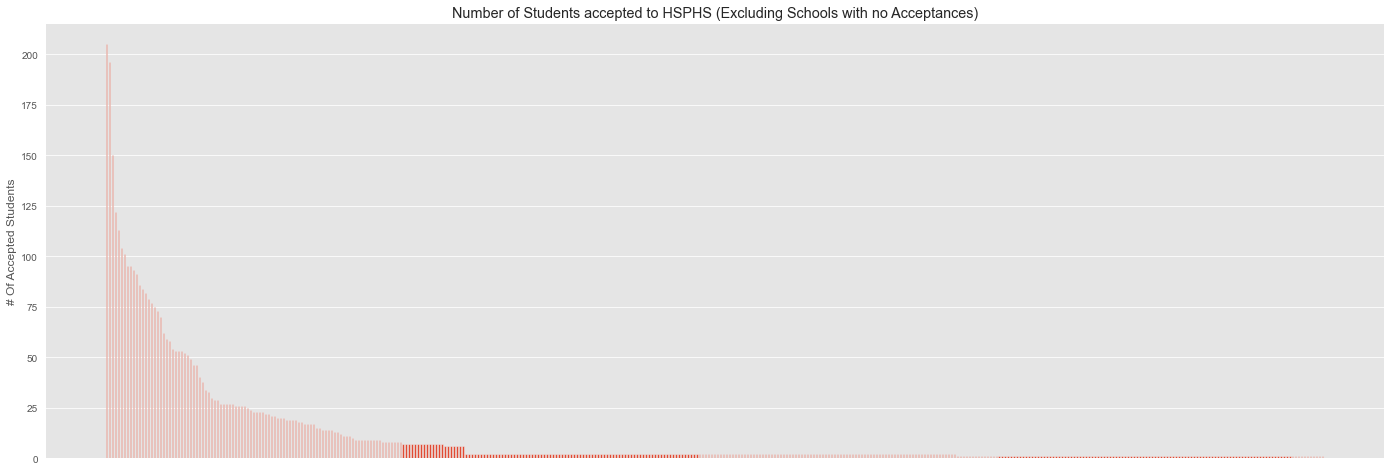

<Figure size 432x288 with 0 Axes>

In [141]:
plt.style.use('ggplot')
plt.figure(figsize=(24,8))
plt.ylabel('# Of Accepted Students')
plt.xticks([])
plt.title("Number of Students accepted to HSPHS (Excluding Schools with no Acceptances)")
plt.bar(df.dbn, df.acceptances.sort_values(ascending=False), width=.5)
plt.show()
plt.savefig("Fig Q7.1.png", bbox_inches="tight")

### Q8) Build a model of your choice – clustering, classification or prediction – that includes all factors – as to what school characteristics are most important in terms of a) sending students to HSPHS, b) achieving high scores on objective measures of achievement? 

In [142]:
df = data.copy()

In [143]:
df.columns

Index(['dbn', 'school_name', 'applications', 'acceptances',
       'per_pupil_spending', 'avg_class_size', 'asian_percent',
       'black_percent', 'hispanic_percent', 'multiple_percent',
       'white_percent', 'rigorous_instruction', 'collaborative_teachers',
       'supportive_environment', 'effective_school_leadership',
       'strong_family_community_ties', 'trust', 'disability_percent',
       'poverty_percent', 'ESL_percent', 'school_size', 'student_achievement',
       'reading_scores_exceed', 'math_scores_exceed'],
      dtype='object')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           594 non-null    object 
 1   school_name                   594 non-null    object 
 2   applications                  594 non-null    int64  
 3   acceptances                   594 non-null    int64  
 4   per_pupil_spending            473 non-null    float64
 5   avg_class_size                473 non-null    float64
 6   asian_percent                 592 non-null    float64
 7   black_percent                 592 non-null    float64
 8   hispanic_percent              592 non-null    float64
 9   multiple_percent              592 non-null    float64
 10  white_percent                 592 non-null    float64
 11  rigorous_instruction          551 non-null    float64
 12  collaborative_teachers        551 non-null    float64
 13  suppo

In [145]:
df = df[df['applications'].notna()]
df = df[df['acceptances'].notna()]
df = df[df['per_pupil_spending'].notna()]
df = df[df['avg_class_size'].notna()]
df = df[df['asian_percent'].notna()]
df = df[df['black_percent'].notna()]
df = df[df['hispanic_percent'].notna()]
df = df[df['multiple_percent'].notna()]
df = df[df['white_percent'].notna()]
df = df[df['rigorous_instruction'].notna()]
df = df[df['collaborative_teachers'].notna()]
df = df[df['supportive_environment'].notna()]
df = df[df['effective_school_leadership'].notna()]
df = df[df['strong_family_community_ties'].notna()]
df = df[df['trust'].notna()]
df = df[df['disability_percent'].notna()]
df = df[df['poverty_percent'].notna()]
df = df[df['ESL_percent'].notna()]
df = df[df['school_size'].notna()]
df = df[df['student_achievement'].notna()]
df = df[df['reading_scores_exceed'].notna()]
df = df[df['math_scores_exceed'].notna()]

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 484
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   dbn                           449 non-null    object 
 1   school_name                   449 non-null    object 
 2   applications                  449 non-null    int64  
 3   acceptances                   449 non-null    int64  
 4   per_pupil_spending            449 non-null    float64
 5   avg_class_size                449 non-null    float64
 6   asian_percent                 449 non-null    float64
 7   black_percent                 449 non-null    float64
 8   hispanic_percent              449 non-null    float64
 9   multiple_percent              449 non-null    float64
 10  white_percent                 449 non-null    float64
 11  rigorous_instruction          449 non-null    float64
 12  collaborative_teachers        449 non-null    float64
 13  suppo

In [147]:
temp = df[['applications',
'acceptances',
'per_pupil_spending',
'avg_class_size',
'asian_percent',
'black_percent',
'hispanic_percent',
'multiple_percent',
'white_percent',
'rigorous_instruction',
'collaborative_teachers',
'supportive_environment',
'effective_school_leadership',
'strong_family_community_ties',
'trust',
'disability_percent',
'poverty_percent',
'ESL_percent',
'school_size',
'student_achievement',
'reading_scores_exceed',
'math_scores_exceed']]
corMatrix = temp.corr(method="pearson")
corMatrix


,applications,acceptances,per_pupil_spending,avg_class_size,asian_percent,black_percent,hispanic_percent,multiple_percent,white_percent,rigorous_instruction,...,effective_school_leadership,strong_family_community_ties,trust,disability_percent,poverty_percent,ESL_percent,school_size,student_achievement,reading_scores_exceed,math_scores_exceed
applications,1.000000,0.805278,-0.409205,0.392699,0.577808,-0.345739,-0.252046,0.065038,0.334859,0.236706,...,0.012803,-0.192852,-0.052115,-0.407129,-0.327546,-0.132218,0.712516,0.241265,0.494937,0.508787
acceptances,0.805278,1.000000,-0.342782,0.356322,0.526372,-0.313779,-0.299009,0.187630,0.384032,0.240190,...,0.004404,-0.040860,-0.031936,-0.385235,-0.433044,-0.177707,0.473266,0.278506,0.533608,0.551219
per_pupil_spending,-0.409205,-0.342782,1.000000,-0.461250,-0.372722,0.203965,0.220052,-0.126934,-0.258132,-0.232731,...,-0.020675,0.050238,0.032769,0.636153,0.343736,0.236423,-0.532469,-0.150505,-0.498168,-0.482391
avg_class_size,0.392699,0.356322,-0.461250,1.000000,0.345016,-0.387557,-0.108020,0.073699,0.397643,0.313462,...,0.069616,0.082172,0.071175,-0.479194,-0.412562,-0.129627,0.448548,0.205941,0.526320,0.548851
asian_percent,0.577808,0.526372,-0.372722,0.345016,1.000000,-0.419171,-0.376441,0.177664,0.226568,0.216158,...,-0.061925,-0.164423,-0.103996,-0.474023,-0.271920,-0.028493,0.499443,0.260442,0.518622,0.561730
black_percent,-0.345739,-0.313779,0.203965,-0.387557,-0.419171,1.000000,-0.431994,0.008967,-0.469331,-0.262817,...,-0.034894,0.032377,-0.077378,0.312017,0.300404,-0.298629,-0.398306,-0.316918,-0.412106,-0.481185
hispanic_percent,-0.252046,-0.299009,0.220052,-0.108020,-0.376441,-0.431994,1.000000,-0.403732,-0.395112,-0.096342,...,0.004287,-0.103125,0.096289,0.226553,0.489426,0.559324,-0.149688,-0.066300,-0.405328,-0.369813
multiple_percent,0.065038,0.187630,-0.126934,0.073699,0.177664,0.008967,-0.403732,1.000000,0.265463,0.134605,...,-0.070468,0.118179,-0.133839,-0.226677,-0.506991,-0.346892,0.025422,0.078366,0.404682,0.364642
white_percent,0.334859,0.384032,-0.258132,0.397643,0.226568,-0.469331,-0.395112,0.265463,1.000000,0.306612,...,0.108851,0.228484,0.086461,-0.320356,-0.815881,-0.283950,0.341514,0.310926,0.654014,0.671092
rigorous_instruction,0.236706,0.240190,-0.232731,0.313462,0.216158,-0.262817,-0.096342,0.134605,0.306612,1.000000,...,0.512891,0.396123,0.412111,-0.269053,-0.331556,-0.172625,0.184718,0.429435,0.480847,0.461386


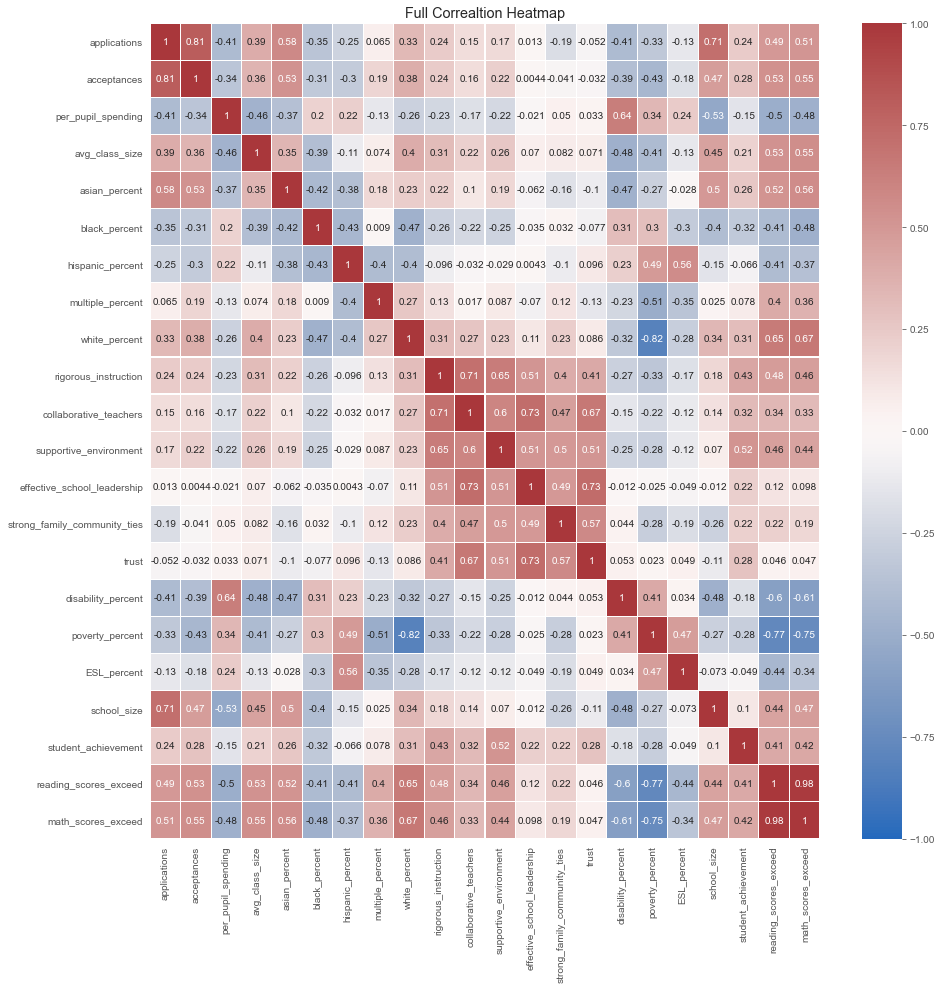

In [148]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corMatrix, cmap='vlag', vmax=1, vmin=-1, linewidths=0.1, annot=True, annot_kws={"fontsize":10}, ax=ax)
plt.title('Full Correaltion Heatmap')
plt.savefig("Fig Q8.1.png", bbox_inches="tight")

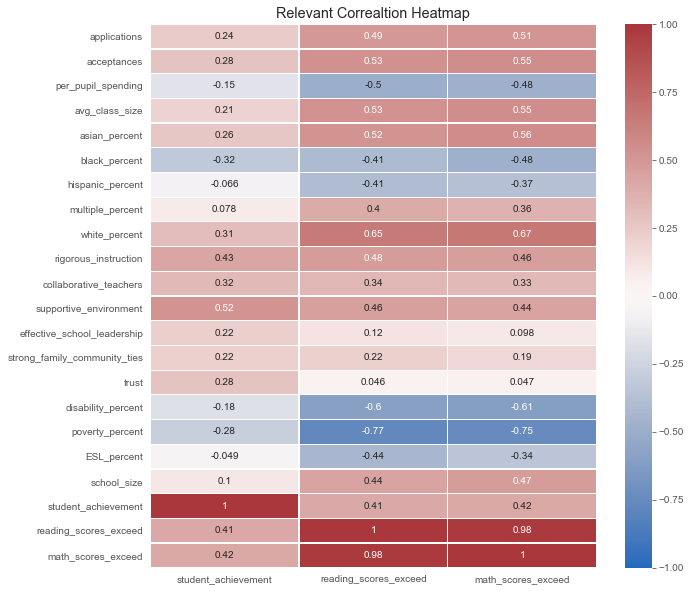

In [149]:
corMatrix = corMatrix[['student_achievement', 'reading_scores_exceed', 'math_scores_exceed']]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corMatrix, linewidths=.25, cmap='vlag', vmax=1, vmin=-1, annot=True, ax=ax)
plt.title('Relevant Correaltion Heatmap')
plt.savefig("Fig Q8.2.png", bbox_inches="tight")

In [150]:
X = df[['white_percent', 'poverty_percent', 'disability_percent']]
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.6886998551381038

In [151]:
X = df[['white_percent', 'poverty_percent', 'disability_percent']]
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.680572472155761

In [152]:
X = df[['poverty_percent', 'disability_percent']]
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.6855286669049274

In [153]:
X = df[['poverty_percent', 'disability_percent']]
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.6674326032231055

In [154]:
from sklearn.preprocessing import StandardScaler
features = ['reading_scores_exceed', 'math_scores_exceed']
# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [155]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

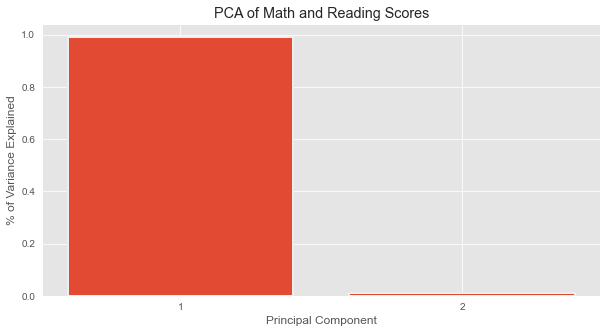

In [156]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.ylabel('% of Variance Explained')
plt.xlabel('Principal Component')
plt.title("PCA of Math and Reading Scores")
PC_values = np.arange(pca.n_components_) + 1
plt.xticks([1,2])
plt.bar(PC_values, pca.explained_variance_ratio_, linewidth=2)
plt.savefig("Fig Q8.3.png", bbox_inches="tight")

In [157]:
targetDf = principalDf[['principal component 1']]

In [158]:
X = df[['per_pupil_spending',
'avg_class_size',
'asian_percent',
'black_percent',
'hispanic_percent',
'multiple_percent',
'white_percent',
'rigorous_instruction',
'collaborative_teachers',
'supportive_environment',
'effective_school_leadership',
'strong_family_community_ties',
'trust',
'disability_percent',
'poverty_percent',
'ESL_percent',
'school_size'
]]
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.8176839736178583

In [159]:
X = df[['per_pupil_spending',
'avg_class_size',
'asian_percent',
'black_percent',
'hispanic_percent',
'multiple_percent',
'white_percent',
'rigorous_instruction',
'collaborative_teachers',
'supportive_environment',
'effective_school_leadership',
'strong_family_community_ties',
'trust',
'disability_percent',
'poverty_percent',
'ESL_percent',
'school_size'
]]
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.8061753446974121

In [160]:
X = df[['per_pupil_spending',
'avg_class_size',
'asian_percent',
'black_percent',
'hispanic_percent',
'multiple_percent',
'white_percent',
'rigorous_instruction',
'collaborative_teachers',
'supportive_environment',
'effective_school_leadership',
'strong_family_community_ties',
'trust',
'disability_percent',
'poverty_percent',
'ESL_percent',
'school_size'
]]
y = targetDf
model = LinearRegression().fit(X, y)
model.score(X, y)

0.8155317144896093

In [161]:
from sklearn.preprocessing import StandardScaler
features = [
'per_pupil_spending',
'avg_class_size',
'asian_percent',
'black_percent',
'hispanic_percent',
'multiple_percent',
'white_percent',
'rigorous_instruction',
'collaborative_teachers',
'supportive_environment',
'effective_school_leadership',
'strong_family_community_ties',
'trust',
'disability_percent',
'poverty_percent',
'ESL_percent',
'school_size']
# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [162]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4',
                         'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8',
                         'principal component 9', 'principal component 10', 'principal component 11', 'principal component 12',
                         'principal component 13', 'principal component 14', 'principal component 15', 'principal component 16',
                         'principal component 17'])

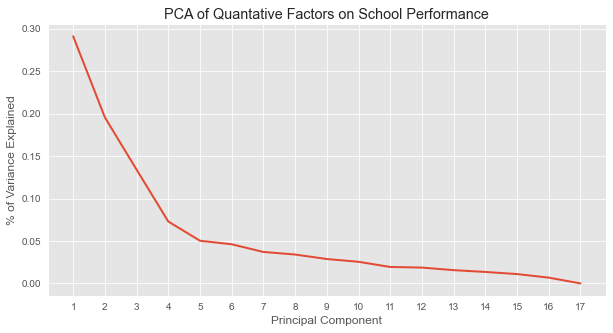

In [163]:
plt.style.use('ggplot')
plt.figure(figsize=(10,5))
plt.ylabel('% of Variance Explained')
plt.xlabel('Principal Component')
plt.title("PCA of Quantative Factors on School Performance")
PC_values = np.arange(pca.n_components_) + 1
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17])
plt.plot(PC_values, pca.explained_variance_ratio_, linewidth=2)
plt.savefig("Fig Q8.4.png", bbox_inches="tight")

In [164]:
pca.explained_variance_ratio_[:5].sum()

0.7437897030587075

In [165]:
pcaInputDf = principalDf[['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4','principal component 5', 
                          #'principal component 6', 
                          #'principal component 7', 'principal component 8','principal component 9'
                         ]]

In [166]:
X = pcaInputDf
y = df[['math_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.780858422840882

In [167]:
X = pcaInputDf
y = df[['reading_scores_exceed']]
model = LinearRegression().fit(X, y)
model.score(X, y)

0.7814477850356082

In [168]:
X = pcaInputDf
y = targetDf
model = LinearRegression().fit(X, y)
model.score(X, y)

0.7857987202286576

In [169]:
from sklearn.model_selection import train_test_split
X = pcaInputDf
y = df[['math_scores_exceed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.7452581565417429

In [170]:
X = pcaInputDf
y = df[['reading_scores_exceed']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.7556899510087786

In [171]:
X = pcaInputDf
y = targetDf

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

model = LinearRegression().fit(X_train, y_train)
model.score(X_test, y_test)

0.7557197295397089